In [1]:
#Project config

#Python version should be greater of equal 3.5
import sys
assert sys.version_info >= (3,5)

import sklearn
sklearn.__version__ >= "0.20"

import numpy as np
import pandas as pd
import os

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes',labelsize=14)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)

#Image saving directory
PROJECT_ROOT_DIR = "."
project_name = "housing"
IMAGE_FOLDER = os.path.join(PROJECT_ROOT_DIR,"images",project_name)
os.makedirs(IMAGE_FOLDER,exist_ok=True)

def save_fig(fig_id,img_extension='png',tight_layout=True,resolution=200):
    path = os.path.join(IMAGE_FOLDER,fig_id + "." + img_extension)
    print('saving figure',fig_id)
    if tight_layout == True:
        plt.tight_layout()
    plt.savefig(path,format=img_extension,dpi = resolution)
    
import warnings
warnings.filterwarnings(action='ignore',message="^internal gelsd")

In [2]:
#Getting the data
DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join('datasets','housing')
housing_url = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

import tarfile
import urllib

def fetch_housing_data(housing_url = housing_url,housing_path = HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path,'housing.tgz')
    urllib.request.urlretrieve(housing_url,tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [3]:
fetch_housing_data()

In [4]:
def load_housing_data(housing_path=HOUSING_PATH):
    path = os.path.join(housing_path,'housing.csv')
    return pd.read_csv(path)

housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
#Analysing Data

In [6]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [7]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [8]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


saving figure housing_attributes_histogram


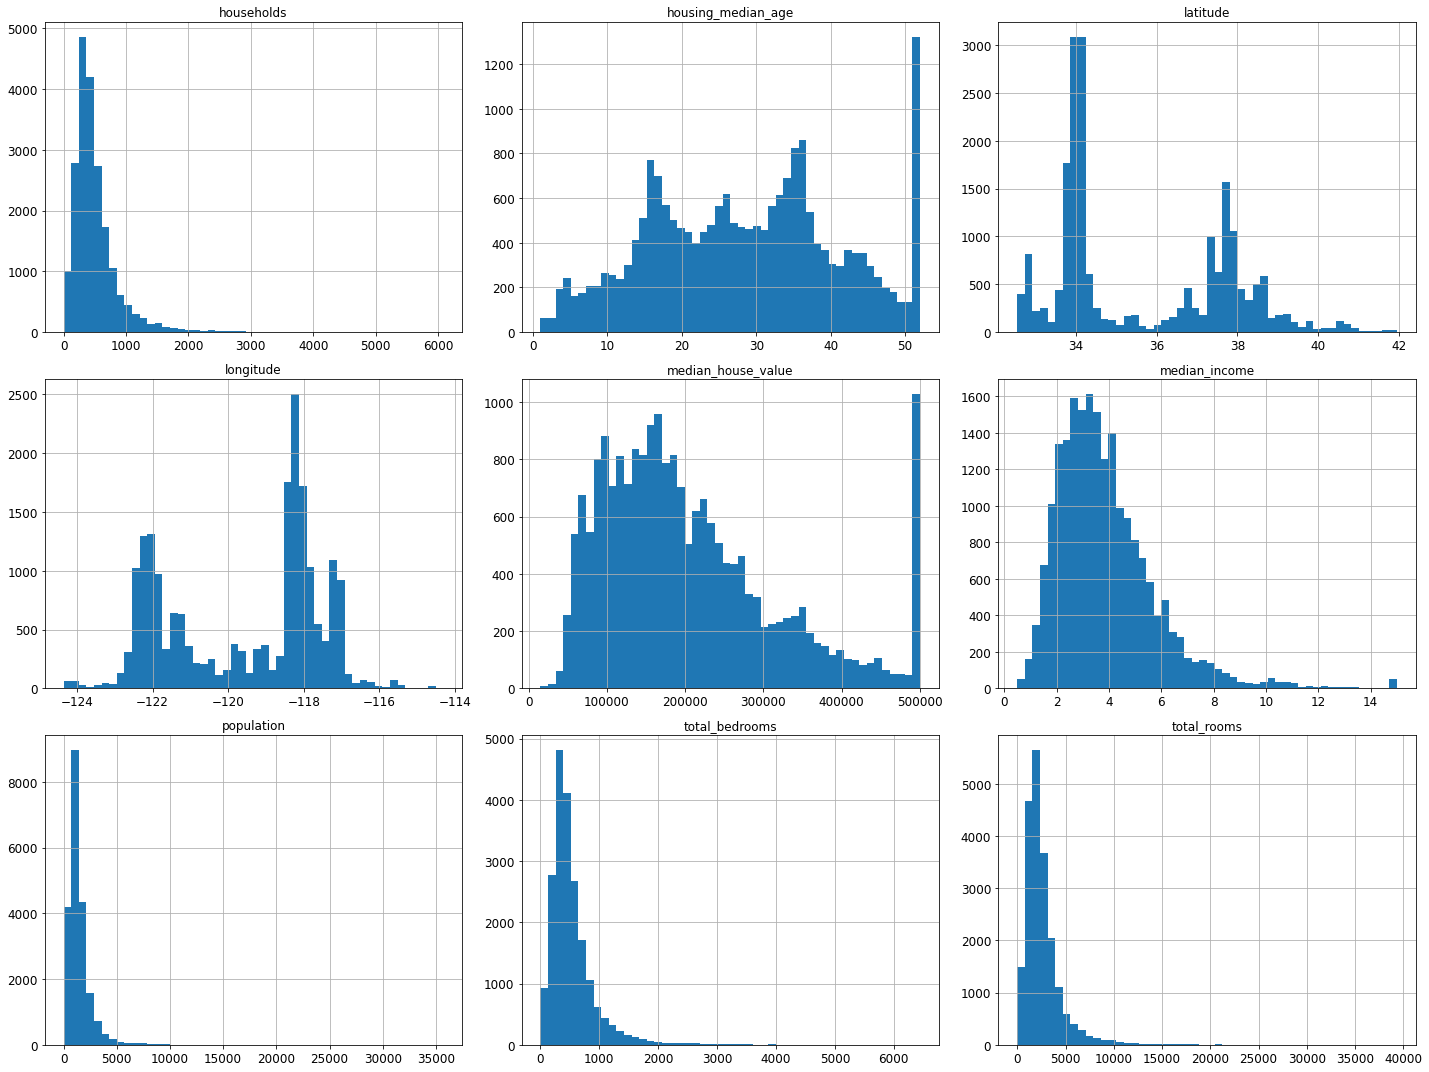

In [9]:
housing.hist(bins=50,figsize=(20,15))
save_fig('housing_attributes_histogram')
plt.show()

In [10]:
np.random.seed(42)

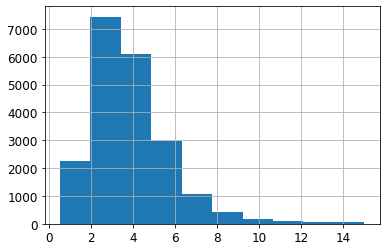

In [11]:
housing["median_income"].hist()

In [12]:
housing['income_cat'] = pd.cut(housing["median_income"],
                               bins=[0.,1.5,3,4.5,6,np.inf],
                               labels=[1,2,3,4,5])

In [13]:
housing['income_cat'].value_counts()

3    7236
2    6581
4    3639
5    2362
1     822
Name: income_cat, dtype: int64

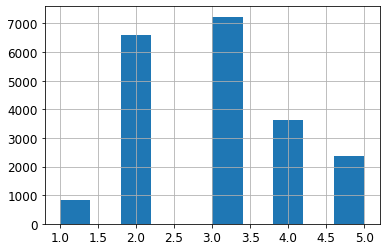

In [14]:
housing['income_cat'].hist()

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2)
for train_idx,test_idx in split.split(housing,housing['income_cat']):
    strat_trainset = housing.loc[train_idx]
    strat_testset = housing.loc[test_idx]

In [16]:
strat_testset['income_cat'].value_counts() / len(strat_testset)

3    0.350533
2    0.318798
4    0.176357
5    0.114583
1    0.039729
Name: income_cat, dtype: float64

In [17]:
housing['income_cat'].value_counts() / len(housing)

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [18]:
#comparing
def income_cat_proportion(data):
    return data['income_cat'].value_counts() / len(data)

from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
pd.DataFrame({
    "overall":income_cat_proportion(housing),
    "stratified": income_cat_proportion(strat_testset),
    "random": income_cat_proportion(test_set)
}).sort_index()

# compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
# compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

,overall,stratified,random
1,0.039826,0.039729,0.040213
2,0.318847,0.318798,0.324370
3,0.350581,0.350533,0.358527
4,0.176308,0.176357,0.167393
5,0.114438,0.114583,0.109496


In [19]:
for set_ in (strat_trainset,strat_testset):
    set_.drop('income_cat',inplace=True,axis=1)

In [20]:
#Visualization

saving figure Lat vs Long


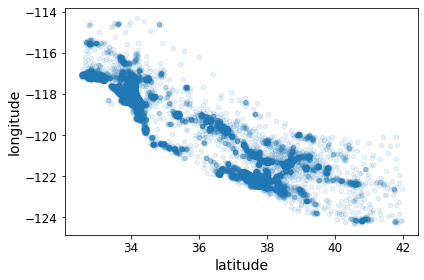

In [21]:
housing.plot(kind="scatter",x='latitude',y='longitude',alpha=0.1)
save_fig("Lat vs Long")

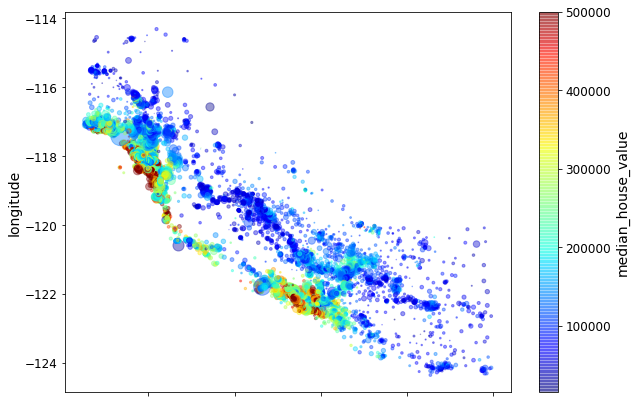

In [22]:
housing.plot(kind="scatter",x='latitude',y='longitude',s=housing['population']/100,c="median_house_value",alpha=0.4,cmap=plt.cm.jet,figsize=(10,7))
# save_fig("Lat vs Long")

In [23]:
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'income_cat'],
      dtype='object')

In [24]:
corr_matrix = housing.corr()

In [25]:
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

saving figure various attrs scatter matrix


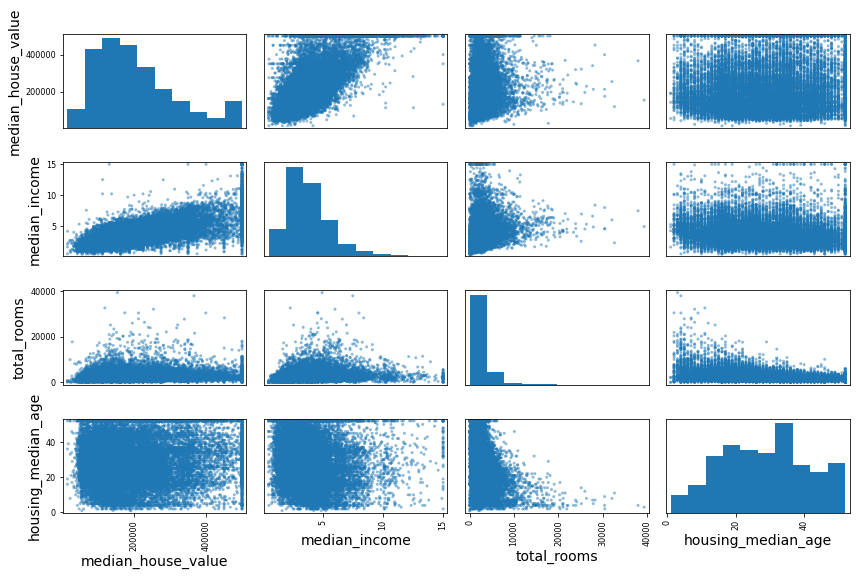

In [26]:
from pandas.plotting import scatter_matrix
attrs = ['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(housing[attrs],figsize=(12,8))
save_fig('various attrs scatter matrix')
plt.show()

saving figure medianHV vs median_income


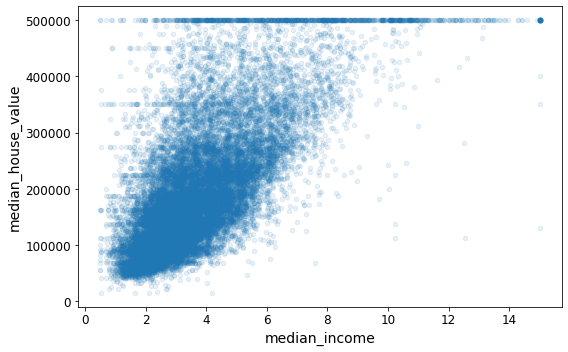

In [27]:
housing.plot(kind="scatter",y = "median_house_value",x="median_income",alpha=0.1,figsize=(8,5))
save_fig("medianHV vs median_income")

In [28]:
#making new features

In [29]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms']
housing['population_per_household'] = housing['population'] / housing['households']

In [30]:
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

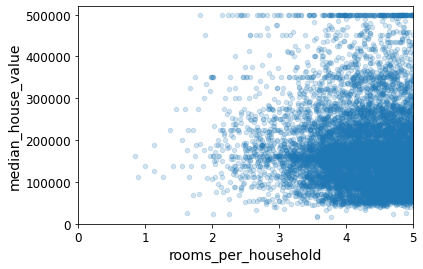

In [31]:
housing.plot(kind="scatter",x = "rooms_per_household",y = "median_house_value",alpha=0.2)
plt.axis([0, 5, 0, 520000])
plt.show()

In [32]:
#preparing data for machine learning

In [33]:
housing = strat_trainset.drop(['median_house_value'],axis = 1)
housing_labels = strat_trainset['median_house_value'].copy()

In [34]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head()
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
4629,-118.30,34.07,18.0,3759.0,NaN,3296.0,1462.0,2.2708,<1H OCEAN
6068,-117.86,34.01,16.0,4632.0,NaN,3038.0,727.0,5.1762,<1H OCEAN
17923,-121.97,37.35,30.0,1955.0,NaN,999.0,386.0,4.6328,<1H OCEAN
13656,-117.30,34.05,6.0,2155.0,NaN,1039.0,391.0,1.6675,INLAND
19252,-122.79,38.48,7.0,6837.0,NaN,3468.0,1405.0,3.1662,<1H OCEAN


In [35]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [36]:
housing_num = housing.drop(['ocean_proximity'],axis=1)
# alternatively: housing_num = housing.select_dtypes(include=[np.number])

In [37]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [38]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [39]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [40]:
X = imputer.transform(housing_num)

In [41]:
housing_tr = pd.DataFrame(X,columns=housing_num.columns,index=housing_num.index)
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347


In [42]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat = housing[['ocean_proximity']]
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [43]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

In [44]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [45]:
#More formal & advanced appraoch for data preprocessing

In [46]:
from sklearn.base import BaseEstimator , TransformerMixin
rooms_idx,bedroom_idx,population_idx,household_idx = 3,4,5,6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
        def __init__(self,add_bedrooms_per_room = True):
            self.add_bedrooms_per_room = add_bedrooms_per_room
            
        def fit(self,X,y=None):
            return self
        
        def transform(self,X):
            rooms_per_household = X[:,rooms_idx] / X[:,household_idx]
            population_per_household = X[:,population_idx] / X[:,household_idx]
            if self.add_bedrooms_per_room == True:
                bedrooms_per_room = X[:,bedroom_idx] / X[:,rooms_idx]
                return np.c_[X,rooms_per_household,population_per_household,bedrooms_per_room]
            else:
                return np.c_[X,rooms_per_household,population_per_household]
    
cmbadder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = cmbadder.transform(housing.values)    

In [47]:
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns= list(housing.columns) + ["rooms_per_household","population_per_household"],
    index = housing.index)

housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
17606,-121.89,37.29,38,1568,351,710,339,2.7042,<1H OCEAN,4.62537,2.0944
18632,-121.93,37.05,14,679,108,306,113,6.4214,<1H OCEAN,6.00885,2.70796
14650,-117.2,32.77,31,1952,471,936,462,2.8621,NEAR OCEAN,4.22511,2.02597
3230,-119.61,36.31,25,1847,371,1460,353,1.8839,INLAND,5.23229,4.13598
3555,-118.59,34.23,17,6592,1525,4459,1463,3.0347,<1H OCEAN,4.50581,3.04785


In [48]:
#preprocessing pipeline for numerical attribs

In [49]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipline = Pipeline([
    ("imputer",SimpleImputer(strategy="median")),
    ("cmb_addr",CombinedAttributesAdder()),
    ("std_scaler",StandardScaler())
])
housing_num_tr = num_pipline.fit_transform(housing_num)

In [50]:
housing_num_tr.shape

(16512, 11)

In [51]:
from sklearn.compose import ColumnTransformer

num_attrs = list(housing_num)
cat_attrs = ['ocean_proximity']

col_tffr = ColumnTransformer([
     ("num",num_pipline,num_attrs),
     ("cat",OneHotEncoder(),cat_attrs)
])

housing_prepared = col_tffr.fit_transform(housing)

In [52]:
housing_labels = housing_labels.values.reshape(-1,1)

In [53]:
housing_prepared.shape,housing_labels.shape

((16512, 16), (16512, 1))

In [54]:
#Select and train a model

In [56]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(housing_prepared,housing_labels)

LinearRegression()

In [57]:
some_data = housing.iloc[:5]
some_labels = housing_labels[:5]
some_data_prep = col_tffr.transform(some_data)
some_data_pred = lin_reg.predict(some_data_prep)

In [58]:
housing_predictions = lin_reg.predict(housing_prepared)

In [66]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
# mae = mean_absolute_error(housing_labels,housing_predictions)
# mse = mean_squared_error(housing_labels,housing_predictions)
# rmse = np.sqrt(mse)
# print(f' MAE: {mae:.4f} \n MSE: {mse:.4f} \n {rmse:.4f}')

In [67]:
def model_metrics(model,data_prepared=housing_prepared,true_labels=housing_labels):
    predictions = model.predict(data_prepared)
    mae = mean_absolute_error(true_labels,predictions)
    mse = mean_squared_error(true_labels,predictions)
    rmse = np.sqrt(mse)
    print(f' MAE: {mae:.4f} \n MSE: {mse:.4f} \n RMSE:{rmse:.4f}')  
    
model_metrics(lin_reg)

 MAE: 49439.8960 
 MSE: 4709829587.9711 
 RMSE:68628.1982


In [68]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor().fit(housing_prepared,housing_labels)

model_metrics(dtr)

 MAE: 0.0000 
 MSE: 0.0000 
 RMSE:0.0000


In [69]:
#fine tuning DecisionTree modelabs

In [70]:
from sklearn.model_selection import cross_val_score
def cross_val(model):
    scores = cross_val_score(model,housing_prepared,housing_labels,
                            scoring="neg_mean_squared_error",cv=10)
    rmse = np.sqrt(-scores)
    return rmse

rmse = cross_val(dtr)

In [71]:
def print_scores(rmse):
    print(f' mean:{np.mean(rmse)} \n std:{np.std(rmse)} \n max:{np.max(rmse)} \n min:{np.min(rmse)}')
print_scores(rmse)

 mean:71232.9297404116 
 std:2655.051756607601 
 max:76416.89362501455 
 min:67215.93096031614


In [72]:
rmse_lin_reg = cross_val(lin_reg)
print_scores(rmse_lin_reg)

 mean:69052.46136345083 
 std:2731.6740017983434 
 max:74739.57052551788 
 min:64969.63056405337


In [73]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=100)
rfr.fit(housing_prepared,housing_labels)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor()

In [74]:
model_metrics(rfr)

 MAE: 12062.2859 
 MSE: 350657503.6100 
 RMSE:18725.8512


In [75]:
rmse_rfr = cross_val(rfr)
print_scores(rmse_rfr)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\mod

 mean:50176.25325112247 
 std:1990.0722068083455 
 max:53691.63142198625 
 min:47429.059556358436


In [76]:
from sklearn.model_selection import GridSearchCV
param_grid = [
    {"n_estimators": [3,10,30],"max_features":[2,4,6,8]},
    {"bootstrap":[False],"n_estimators":[3,10],"max_features":[2,3,4]}
]

forest_reg = RandomForestRegressor(random_state=42)
grid_search = GridSearchCV(forest_reg,param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)

grid_search.fit(housing_prepared,housing_labels)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\mod

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\mod

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\mod

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\mod

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [77]:
grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

In [78]:
grid_search.best_estimator_

RandomForestRegressor(max_features=8, n_estimators=30, random_state=42)

In [79]:
cvres = grid_search.cv_results_

In [80]:
cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'param_bootstrap', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'split3_train_score', 'split4_train_score', 'mean_train_score', 'std_train_score'])

In [81]:
for score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-score),param)

63669.11631261028 {'max_features': 2, 'n_estimators': 3}
55627.099719926795 {'max_features': 2, 'n_estimators': 10}
53384.57275149205 {'max_features': 2, 'n_estimators': 30}
60965.950449450494 {'max_features': 4, 'n_estimators': 3}
52741.04704299915 {'max_features': 4, 'n_estimators': 10}
50377.40461678399 {'max_features': 4, 'n_estimators': 30}
58663.93866579625 {'max_features': 6, 'n_estimators': 3}
52006.19873526564 {'max_features': 6, 'n_estimators': 10}
50146.51167415009 {'max_features': 6, 'n_estimators': 30}
57869.25276169646 {'max_features': 8, 'n_estimators': 3}
51711.127883959234 {'max_features': 8, 'n_estimators': 10}
49682.273345071546 {'max_features': 8, 'n_estimators': 30}
62895.06951262424 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
54658.176157539405 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
59470.40652318466 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
52724.9822587892 {'bootstrap': False, 'max_features': 3, 'n_estimators'

In [82]:
pd.DataFrame(grid_search.cv_results_).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,param_bootstrap,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.118860,0.009071,0.000000,0.000000,2,3,NaN,"{'max_features': 2, 'n_estimators': 3}",-3.837622e+09,-4.147108e+09,...,-4.053756e+09,1.519591e+08,18,-1.064113e+09,-1.105142e+09,-1.116550e+09,-1.112342e+09,-1.129650e+09,-1.105559e+09,2.220402e+07
1,0.348598,0.000236,0.015640,0.000006,2,10,NaN,"{'max_features': 2, 'n_estimators': 10}",-3.047771e+09,-3.254861e+09,...,-3.094374e+09,1.327062e+08,11,-5.927175e+08,-5.870952e+08,-5.776964e+08,-5.716332e+08,-5.802501e+08,-5.818785e+08,7.345821e+06
2,1.033290,0.006420,0.043760,0.006252,2,30,NaN,"{'max_features': 2, 'n_estimators': 30}",-2.689185e+09,-3.021086e+09,...,-2.849913e+09,1.626875e+08,9,-4.381089e+08,-4.391272e+08,-4.371702e+08,-4.376955e+08,-4.452654e+08,-4.394734e+08,2.966320e+06
3,0.161911,0.005799,0.003127,0.006253,4,3,NaN,"{'max_features': 4, 'n_estimators': 3}",-3.730181e+09,-3.786886e+09,...,-3.716847e+09,1.631510e+08,16,-9.865163e+08,-1.012565e+09,-9.169425e+08,-1.037400e+09,-9.707739e+08,-9.848396e+08,4.084607e+07
4,0.534808,0.010215,0.015636,0.000002,4,10,NaN,"{'max_features': 4, 'n_estimators': 10}",-2.666283e+09,-2.784511e+09,...,-2.781618e+09,1.268607e+08,8,-5.097115e+08,-5.162820e+08,-4.962893e+08,-5.436192e+08,-5.160297e+08,-5.163863e+08,1.542862e+07


In [83]:
feature_importances = grid_search.best_estimator_.feature_importances_

In [84]:
extra_attribs = ['rooms_per_hh','pop_per_hh','bedrooms_per_room']
cat_encoder = col_tffr.named_transformers_.cat
cat_onhot_attribs = list(cat_encoder.categories_[0])
attributes = num_attrs + extra_attribs + cat_onhot_attribs
sorted(zip(feature_importances,attributes),reverse=True)

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hh'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude'),
 (0.056419179181954014, 'rooms_per_hh'),
 (0.053351077347675815, 'bedrooms_per_room'),
 (0.04114379847872964, 'housing_median_age'),
 (0.014874280890402769, 'population'),
 (0.014672685420543239, 'total_rooms'),
 (0.014257599323407808, 'households'),
 (0.014106483453584104, 'total_bedrooms'),
 (0.010311488326303788, '<1H OCEAN'),
 (0.0028564746373201584, 'NEAR OCEAN'),
 (0.0019604155994780706, 'NEAR BAY'),
 (6.0280386727366e-05, 'ISLAND')]

In [85]:
final_model = grid_search.best_estimator_
X_test = strat_testset.drop(['median_house_value'],axis=1)
y_test = strat_testset['median_house_value']

X_test_prepared = col_tffr.transform(X_test)
final_preds = final_model.predict(X_test_prepared)

In [86]:
final_rmse = np.sqrt(mean_squared_error(y_test,final_preds))

In [87]:
final_rmse

47730.22690385927

In [88]:
#Confidence Interval

In [89]:
from scipy import stats
confidence = 0.95
squared_error = (final_preds - y_test) ** 2
np.sqrt(stats.t.interval(confidence,
                         len(squared_error)-1,
                         loc=squared_error.mean(),
                         scale = stats.sem(squared_error)))

array([45685.10470776, 49691.25001878])

In [90]:
#full pipeline including predictior
full_pipline = Pipeline([
    ("prepration",col_tffr),
    ("rForest",RandomForestRegressor(max_features=8,n_estimators=30))
])

full_pipline.fit(housing,housing_labels)

C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\pipeline.py:335: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params_last_step)


Pipeline(steps=[('prepration',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('cmb_addr',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['longitude', 'latitude',
                                                   'housing_median_age',
                                                   'total_rooms',
                                                   'total_bedrooms',
                                                   'population', 'households',
                          

In [91]:
some_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
17606,-121.89,37.29,38.0,1568.0,351.0,710.0,339.0,2.7042,<1H OCEAN
18632,-121.93,37.05,14.0,679.0,108.0,306.0,113.0,6.4214,<1H OCEAN
14650,-117.20,32.77,31.0,1952.0,471.0,936.0,462.0,2.8621,NEAR OCEAN
3230,-119.61,36.31,25.0,1847.0,371.0,1460.0,353.0,1.8839,INLAND
3555,-118.59,34.23,17.0,6592.0,1525.0,4459.0,1463.0,3.0347,<1H OCEAN


In [92]:
full_pred = full_pipline.predict(X_test)

In [93]:
np.sqrt(mean_squared_error(y_test,full_pred))

47894.393540854675

In [94]:
#model persistence

In [95]:
import joblib

In [96]:
final_model = full_pipline
joblib.dump(final_model,"final_model.pkl")

['final_model.pkl']

In [97]:
final_loaded_model = joblib.load("final_model.pkl")

# Exercises

Question: Try a Support Vector Machine regressor (`sklearn.svm.SVR`), with various hyperparameters such as `kernel="linear"` (with various values for the `C` hyperparameter) or `kernel="rbf"` (with various values for the `C` and `gamma` hyperparameters). Don't worry about what these hyperparameters mean for now. How does the best `SVR` predictor perform?

In [98]:
from sklearn.svm import SVR
svr = SVR()

In [101]:
param_grid = [
    {"kernel":['linear'],"C":[10.,30000.]}, #,30.,15000.
    {"kernel":['rbf'],
         "C":[1.,1000.], #3.,10.
         "gamma":[0.1,0.,3.0] # ,0.3,1.
    }
]

grid_svr = GridSearchCV(svr,param_grid,cv=2,
                        scoring="neg_mean_squared_error",
                        return_train_score=True,
                        n_jobs=-1,
                        verbose=2
                   )

grid_svr.fit(housing_prepared,housing_labels)

Fitting 2 folds for each of 8 candidates, totalling 16 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 out of  16 | elapsed:  1.4min finished
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GridSearchCV(cv=2, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10.0, 30000.0], 'kernel': ['linear']},
                         {'C': [1.0, 1000.0], 'gamma': [0.1, 0.0, 3.0],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)

In [102]:
grid_svr.best_params_

{'C': 30000.0, 'kernel': 'linear'}

In [103]:
np.sqrt(-grid_svr.best_score_)

70455.18671616922

In [104]:
grid_svr.score

<bound method BaseSearchCV.score of GridSearchCV(cv=2, estimator=SVR(), n_jobs=-1,
             param_grid=[{'C': [10.0, 30000.0], 'kernel': ['linear']},
                         {'C': [1.0, 1000.0], 'gamma': [0.1, 0.0, 3.0],
                          'kernel': ['rbf']}],
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=2)>

In [105]:
cvres = grid_svr.cv_results_
for score,param in zip(cvres['mean_test_score'],cvres['params']):
    print(np.sqrt(-score),param)

91600.73573325975 {'C': 10.0, 'kernel': 'linear'}
70455.18671616922 {'C': 30000.0, 'kernel': 'linear'}
118777.38383887663 {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
118955.23997595882 {'C': 1.0, 'gamma': 0.0, 'kernel': 'rbf'}
118950.90718228994 {'C': 1.0, 'gamma': 3.0, 'kernel': 'rbf'}
76494.67580832716 {'C': 1000.0, 'gamma': 0.1, 'kernel': 'rbf'}
118955.23997595882 {'C': 1000.0, 'gamma': 0.0, 'kernel': 'rbf'}
115939.12825041525 {'C': 1000.0, 'gamma': 3.0, 'kernel': 'rbf'}


In [106]:
#2

In [107]:
from scipy.stats import expon,reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [108]:
param_distributions = [
    {"kernel":['linear','rbf'],
    "C": reciprocal(20,20000),
    "gamma":expon(scale=1.0)}
]

svr_rv = SVR()
grid_randcv = RandomizedSearchCV(svr_rv,param_distributions,cv=2,n_iter=3,
                                   scoring="neg_mean_squared_error",n_jobs=-1,verbose=2)


grid_randcv.fit(housing_prepared,housing_labels)

Fitting 2 folds for each of 3 candidates, totalling 6 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   6 | elapsed:   13.8s remaining:   13.8s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:   16.9s finished
C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


RandomizedSearchCV(cv=2, estimator=SVR(), n_iter=3, n_jobs=-1,
                   param_distributions=[{'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015A4AFEF148>,
                                         'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000015A4AFF4608>,
                                         'kernel': ['linear', 'rbf']}],
                   scoring='neg_mean_squared_error', verbose=2)

In [109]:
grid_randcv.best_params_

{'C': 6117.098106754283, 'gamma': 0.3769328271173089, 'kernel': 'rbf'}

In [110]:
np.sqrt(-grid_randcv.best_score_)

70339.69021535706

Text(0.5, 1.0, 'expon log distribution')

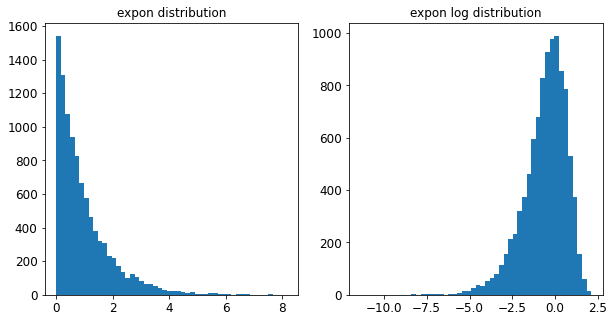

In [111]:
expon_distrib = expon(scale=1.0)
samples = expon_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(samples,bins=50)
plt.title("expon distribution")

plt.subplot(122)
plt.hist(np.log(samples),bins=50)
plt.title("expon log distribution")

Text(0.5, 1.0, 'log of this distribution')

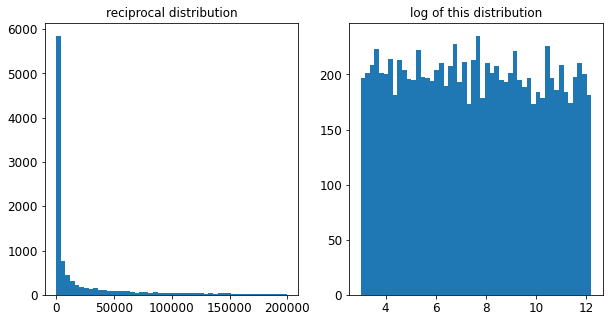

In [112]:
expon_distrib = reciprocal(20,200000)
samples = expon_distrib.rvs(10000,random_state=42)
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.hist(samples,bins=50)
plt.title("reciprocal distribution")

plt.subplot(122)
plt.hist(np.log(samples),bins=50)
plt.title("log of this distribution")

In [ ]:
########

In [173]:
from sklearn.base import TransformerMixin,BaseEstimator

def top_feature_indx(arr,k):
    return np.sort(np.argpartition(np.array(arr),-k)[-k:])

class Top_feature_selector(TransformerMixin,BaseEstimator):
    def __init__(self,feature_importances,k):
        self.feature_importances = feature_importances
        self.k = k
        
    def fit(self,X,y=None):
        self.top_feature_indices = top_feature_indx(self.feature_importances,self.k)
        return self
    
    def transform(self,X):
        print(self.top_feature_indices)
        return X[:,self.top_feature_indices]

In [174]:
np.array(attributes)[[ 0,  1,  7,  9, 12]]

array(['longitude', 'latitude', 'median_income', 'pop_per_hh', 'INLAND'],
      dtype='<U18')

In [175]:
sorted(zip(feature_importances,attributes),reverse=True)[:5]

[(0.36615898061813423, 'median_income'),
 (0.16478099356159054, 'INLAND'),
 (0.10879295677551575, 'pop_per_hh'),
 (0.07334423551601243, 'longitude'),
 (0.06290907048262032, 'latitude')]

In [176]:
prepration_and_feature_selection_pipeline = Pipeline([
    ("prepration",col_tffr),
    ("feature_selection",Top_feature_selector(feature_importances,5))
])

In [177]:
housing_prepared_top_k_features = prepration_and_feature_selection_pipeline.fit_transform(housing)

[ 0  1  7  9 12]


In [178]:
housing_prepared_top_k_features[:3]

array([[-1.15604281,  0.77194962, -0.61493744, -0.08649871,  0.        ],
       [-1.17602483,  0.6596948 ,  1.33645936, -0.03353391,  0.        ],
       [ 1.18684903, -1.34218285, -0.5320456 , -0.09240499,  0.        ]])

In [180]:
prepare_select_predict_pipeline = Pipeline([
    ("prepare",col_tffr),
    ("feature_selection",Top_feature_selector(feature_importances,5)),
    ("predict",SVR(**grid_svr.best_params_))
])

In [182]:
svr_fullpipelne = prepare_select_predict_pipeline.fit(housing,housing_labels)

[ 0  1  7  9 12]


C:\Users\Pankaj Choudhary\Anaconda3\envs\tf\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [184]:
some_data = housing[:4]
some_labels = housing_labels[:4]

print("Predictions:\t", svr_fullpipelne.predict(some_data))
print("Labels:\t\t", list(some_labels))

[ 0  1  7  9 12]
Predictions:	 [189028.33086842 325513.70826136 179741.23706665  67902.71036204]
Labels:		 [array([286600.]), array([340600.]), array([196900.]), array([46300.])]


In [ ]:
svr_fullpipelne()